# The purpose of this notebook is to creatively distort images retrieved from the search engine, we experimented with 3 different ways:

1. Applying neural style transfer using pretrained magenta found at : https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2 (uses 2 images)
2. Applying mixup augmentation technique to merge two images together (uses 2 images)
3. Applying different color maps to show the image (uses 1 image)

# 1. Installing the required packages

In [ ]:
import tensorflow_hub as tf_hub
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from google.colab import drive
drive.mount("/content/drive/")
import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Knowing the version of the libraries will make it easier for us to create the dockerfile later

In [ ]:
for lib in (tf_hub,tf,matplotlib,np,pd,cv2):
  print("Library {lib} version is {version}".format(lib=lib,version=lib.__version__))

Library <module 'tensorflow_hub' from '/usr/local/lib/python3.7/dist-packages/tensorflow_hub/__init__.py'> version is 0.12.0
Library <module 'tensorflow' from '/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py'> version is 2.8.2
Library <module 'matplotlib' from '/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py'> version is 3.2.2
Library <module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'> version is 1.21.6
Library <module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'> version is 1.3.5
Library <module 'cv2' from '/usr/local/lib/python3.7/dist-packages/cv2/__init__.py'> version is 4.6.0


# 2. Loading the description of the pictures in "earth as art nasa" book and their location

In [ ]:
image_description_dataset = pd.read_csv("/content/drive/MyDrive/Deep_learning/earth-as-art-nasa.csv")

In [ ]:
image_description_dataset

,title,location,description,url
0,Akpatok Island,Canada,Akpatok Island rises sharply out of the frigid...,2018_earth_as_art-nasa/OEBPS/image/akpatok_isl...
1,Aleutian Clouds,Bering Sea,Clouds hover over the waters off the western A...,2018_earth_as_art-nasa/OEBPS/image/aleutian.jpg
2,Algerian Desert,Algeria,"Lying amid the Great Eastern Erg, the Great We...",2018_earth_as_art-nasa/OEBPS/image/algerian_sa...
3,Alluvial Fan,China,A vast alluvial fan unfolds across the desolat...,2018_earth_as_art-nasa/OEBPS/image/alluvial_fa...
4,Anti-Atlas Mountains,Morocco,A part of the Atlas Mountains in northwest Afr...,2018_earth_as_art-nasa/OEBPS/image/atlas_mts.jpg
...,...,...,...,...
70,Vatnajökull Glacier Ice Cap,Iceland,Valley glaciers reach into lower lying areas f...,2018_earth_as_art-nasa/OEBPS/image/vatnajokull...
71,Volcanoes,Chile and Argentina,On the border between Chile and the Catamarca ...,2018_earth_as_art-nasa/OEBPS/image/chile_volca...
72,Von Kármán Vortices,Southern Pacific Ocean,Swirling clouds line up in a formation known a...,2018_earth_as_art-nasa/OEBPS/image/karman_vort...
73,Wadi Branches,Jordan,The Terra satellite captured this image of wad...,2018_earth_as_art-nasa/OEBPS/image/jordan.jpg


In [ ]:
magenta = tf_hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [ ]:
magenta

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fc7ff58ab90>

In [ ]:
def fix_image_format(path):
  image = tf.io.read_file(path)
  image = tf.image.decode_image(image,channels=3)
  image = tf.image.convert_image_dtype(image,tf.float32)
  image = image[tf.newaxis,:]
  return image

(1, 757, 768, 3)


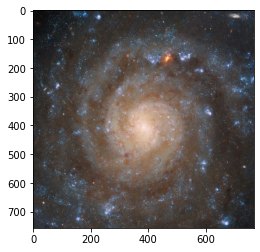

In [ ]:
contentImage = fix_image_format("james2.jfif")
print(contentImage.shape)
plt.imshow(np.squeeze(contentImage))
plt.show()

(1, 757, 768, 3)


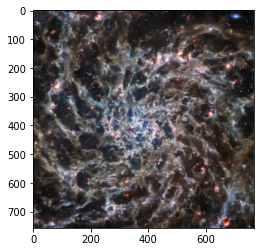

In [ ]:
transferedToImage = fix_image_format("james.jfif")
print(transferedToImage.shape)
plt.imshow(np.squeeze(transferedToImage))
plt.show()

In [ ]:
artisticImage = magenta(tf.constant(transferedToImage),tf.constant(contentImage))[0]

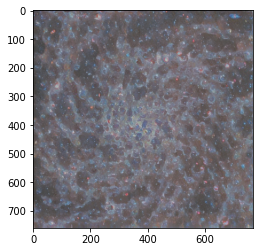

In [ ]:
plt.imshow(np.squeeze(artisticImage))
plt.show()

In [ ]:
a = cv2.imread(image_description_dataset['url'][3])
b = cv2.imread(image_description_dataset['url'][4])
new = cv2.addWeighted(a,0.5,b,0.6,0)

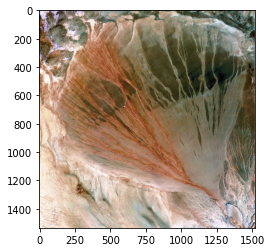

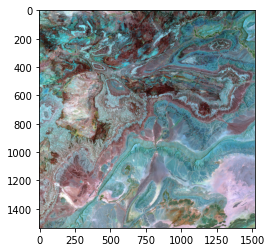

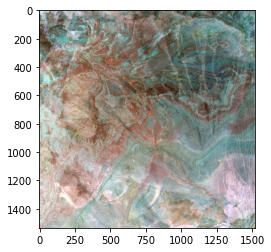

In [ ]:
plt.imshow(a)
plt.show()
plt.imshow(b)
plt.show()
plt.imshow(new)
plt.show()

In [ ]:
import matplotlib

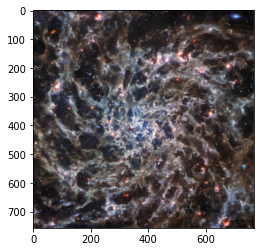

In [ ]:
imp = matplotlib.image.imread("james.jfif")
plt.imshow(imp)

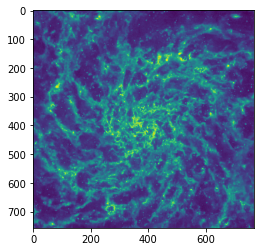

In [ ]:
imp = imp[:,:,1]
plt.imshow(imp)

In [ ]:
filters = ['Accent','Accent_r','Blues','Blues_r','BrBG', 'BrBG_r', 'BuGn', 'BuGn_r','BuPu', 'BuPu_r', 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'coolwarm',
 'coolwarm_r',
 'copper',
 'copper_r',
 'cubehelix',
 'cubehelix_r',
 'flag',
 'flag_r',
 'gist_earth',
 'gist_earth_r',
 'gist_gray',
 'gist_gray_r',
 'gist_heat',
 'gist_heat_r',
 'gist_ncar',
 'gist_ncar_r',
 'gist_rainbow',
 'gist_rainbow_r',
 'gist_stern',
 'gist_stern_r',
 'gist_yarg',
 'gist_yarg_r',
 'gnuplot',
 'gnuplot2',
 'gnuplot2_r',
 'gnuplot_r',
 'gray',
 'gray_r',
 'hot',
 'hot_r',
 'hsv',
 'hsv_r',
 'inferno',
 'inferno_r',
 'jet',
 'jet_r',
 'magma',
 'magma_r',
 'nipy_spectral',
 'nipy_spectral_r',
 'ocean',
 'ocean_r',
 'pink',
 'pink_r',
 'plasma',
 'plasma_r',
 'prism',
 'prism_r',
 'rainbow',
 'rainbow_r',
 'seismic',
 'seismic_r',
 'spring',
 'spring_r',
 'summer',
 'summer_r',
 'tab10',
 'tab10_r',
 'tab20',
 'tab20_r',
 'tab20b',
 'tab20b_r',
 'tab20c',
 'tab20c_r',
 'terrain',
 'terrain_r',
 'twilight',
 'twilight_r',
 'twilight_shifted',
 'twilight_shifted_r',
 'viridis',
 'viridis_r',
 'winter',
 'winter_r']

In [ ]:
len(filters)

164